In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features_df = pd.read_csv('../data/processed/Dataset_encoded.csv')

In [3]:
features_df.head()

,age,num_subscription_pauses,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,...,subscription_Family,subscription_Free,subscription_Premium,subscription_Student,payment_plan_encoded,payment_Apple Pay,payment_Credit Card,payment_Debit Card,payment_Paypal,customer_service_inquiries_encoded
0,32.0,2,-1606,22.391362,105.394516,0.176873,169,109,18,32,...,False,True,False,False,1,False,False,False,True,1
1,64.0,3,-2897,29.294210,52.501115,0.981811,55,163,44,33,...,False,True,False,False,0,False,False,False,True,0
2,51.0,2,-348,15.400312,24.703696,0.048411,244,117,20,129,...,False,False,True,False,1,False,True,False,False,2
3,63.0,4,-2894,22.842084,83.595480,0.035691,442,252,47,120,...,True,False,False,False,1,True,False,False,False,1
4,54.0,3,-92,23.151163,52.578266,0.039738,243,230,41,66,...,True,False,False,False,0,False,False,False,True,2


In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 125000 non-null  float64
 1   num_subscription_pauses             125000 non-null  int64  
 2   signup_date                         125000 non-null  int64  
 3   weekly_hours                        125000 non-null  float64
 4   average_session_length              125000 non-null  float64
 5   song_skip_rate                      125000 non-null  float64
 6   weekly_songs_played                 125000 non-null  int64  
 7   weekly_unique_songs                 125000 non-null  int64  
 8   num_favorite_artists                125000 non-null  int64  
 9   num_platform_friends                125000 non-null  int64  
 10  num_playlists_created               125000 non-null  int64  
 11  num_shared_playlists      

In [5]:
# Calculate correlation with the target variable
correlation_with_churn = features_df.corr()['churned'].sort_values(ascending=False)
print("\nCorrelation with Churn:")
display(correlation_with_churn)


Correlation with Churn:


churned                               1.000000
customer_service_inquiries_encoded    0.371163
subscription_Free                     0.320545
num_subscription_pauses               0.183022
song_skip_rate                        0.160186
subscription_Student                  0.069426
age                                   0.044458
weekly_unique_songs                   0.019357
payment_Apple Pay                     0.006416
location_encoded                      0.004012
num_shared_playlists                  0.003826
payment_Debit Card                    0.001845
weekly_songs_played                   0.000908
signup_date                          -0.001203
payment_plan_encoded                 -0.001350
payment_Paypal                       -0.002104
num_playlists_created                -0.002191
num_platform_friends                 -0.003003
num_favorite_artists                 -0.005375
payment_Credit Card                  -0.006157
average_session_length               -0.006500
notifications

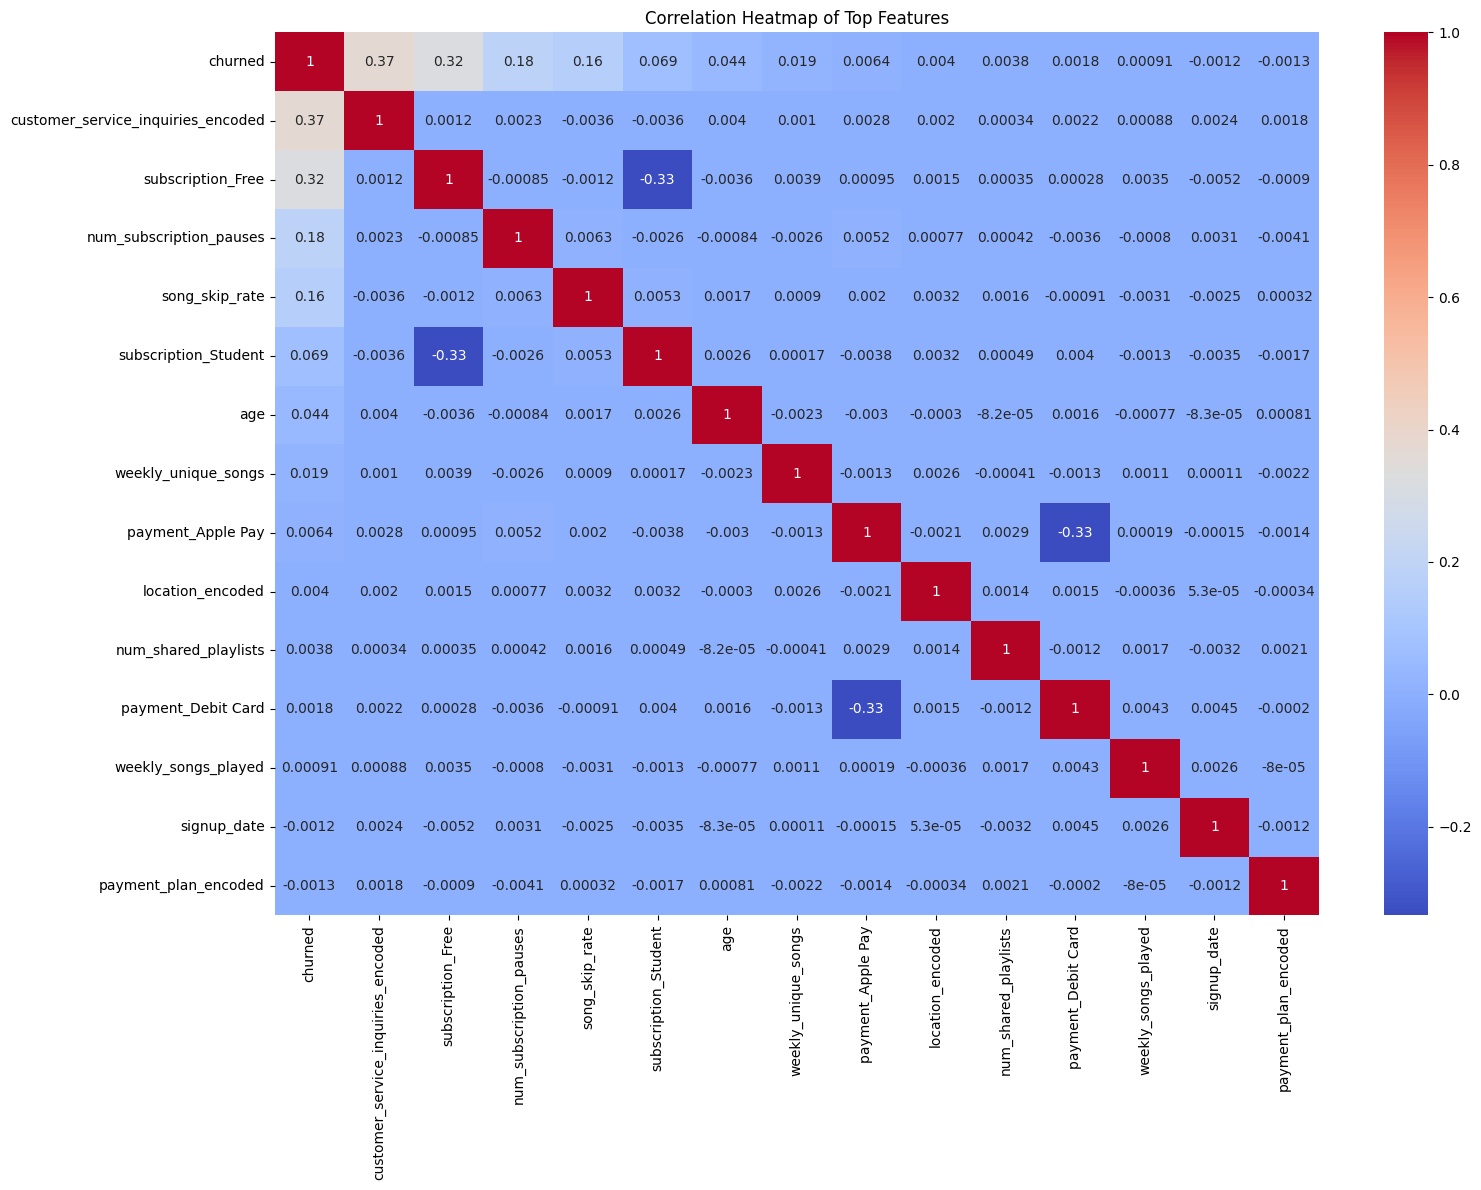

In [6]:
# Visualize correlations
plt.figure(figsize=(16, 12))
top_corr_features = correlation_with_churn.index[:15]  # Top 15 features
sns.heatmap(features_df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.tight_layout()
plt.show()

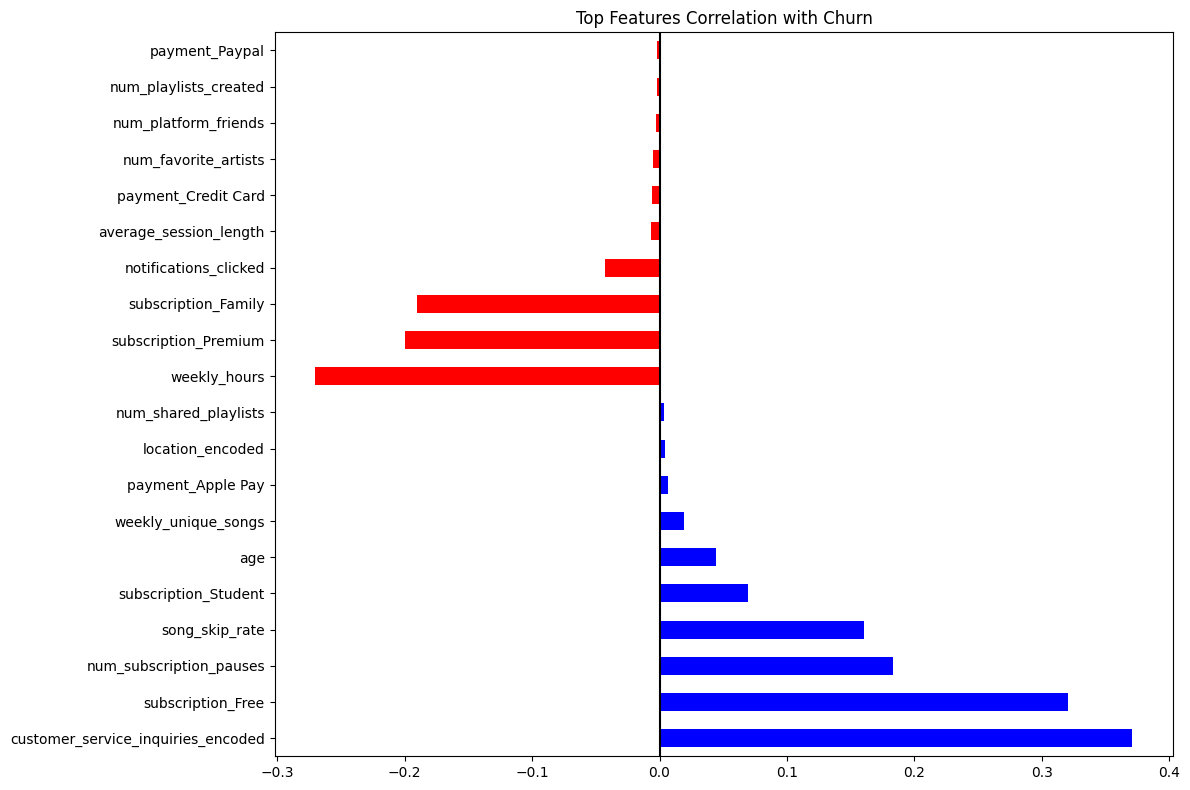

In [7]:
# Plot the top features correlation with churn
plt.figure(figsize=(12, 8))
correlation_with_churn = correlation_with_churn.drop('churned')  # Remove self-correlation
top_positive = correlation_with_churn.sort_values(ascending=False).head(10)
top_negative = correlation_with_churn.sort_values(ascending=True).head(10)
top_features = pd.concat([top_positive, top_negative])
top_features.plot(kind='barh', color=['blue' if x > 0 else 'red' for x in top_features])
plt.title('Top Features Correlation with Churn')
plt.axvline(x=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.feature_selection import mutual_info_classif

In [9]:
X = features_df.drop('churned', axis=1)
y = features_df['churned']

In [10]:
# Calculate mutual information (for both linear and non-linear relationships)
# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print("\nMutual Information Scores (Higher indicates more predictive power):")
display(mi_scores)


Mutual Information Scores (Higher indicates more predictive power):


customer_service_inquiries_encoded    0.077028
subscription_Free                     0.056979
weekly_hours                          0.051894
num_subscription_pauses               0.027350
subscription_Premium                  0.023530
song_skip_rate                        0.022694
subscription_Family                   0.019192
age                                   0.014292
payment_plan_encoded                  0.010811
payment_Debit Card                    0.006052
subscription_Student                  0.004266
payment_Credit Card                   0.003096
payment_Apple Pay                     0.002892
payment_Paypal                        0.002480
notifications_clicked                 0.002170
num_shared_playlists                  0.001471
num_playlists_created                 0.001168
num_favorite_artists                  0.000851
weekly_unique_songs                   0.000710
signup_date                           0.000416
weekly_songs_played                   0.000000
average_sessi

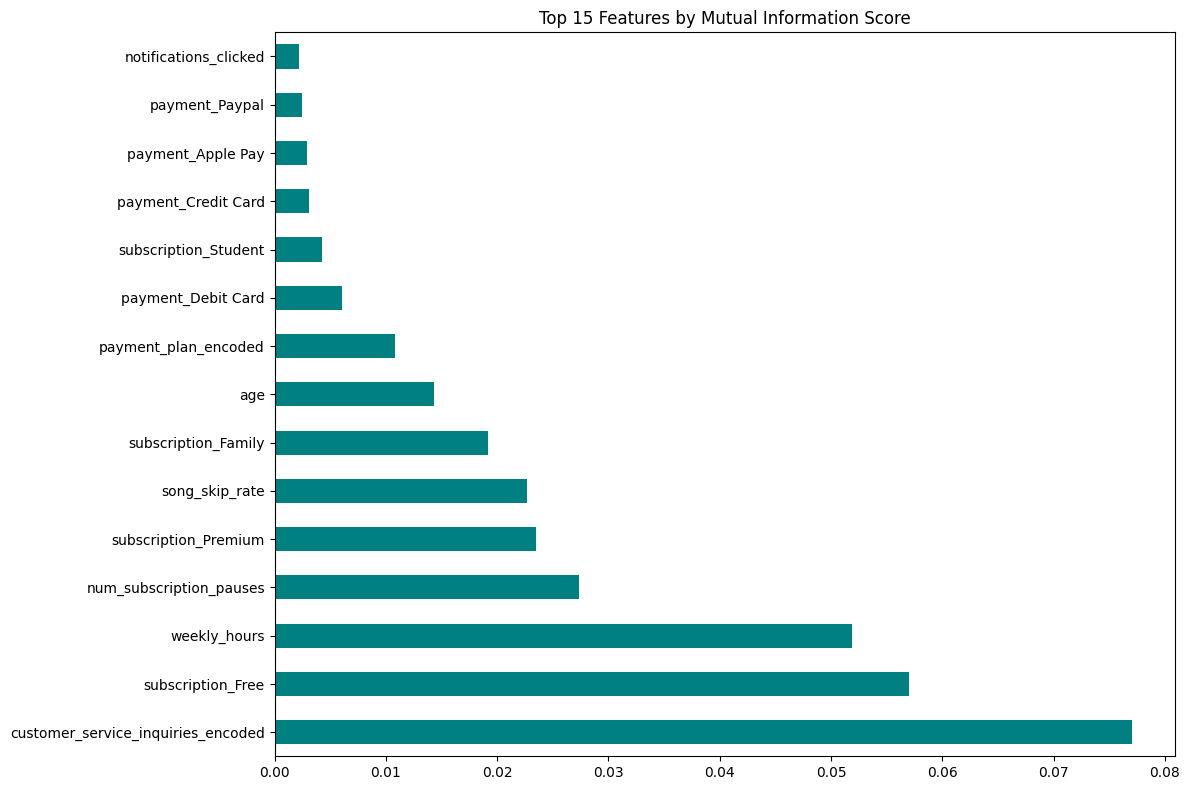

In [11]:
# Visualize mutual information scores
plt.figure(figsize=(12, 8))
mi_scores.head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Features by Mutual Information Score')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Random Forest feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_importance = rf_importance.sort_values(ascending=False)

print("Top 15 features by Random Forest importance:")
print(rf_importance.head(15))

Top 15 features by Random Forest importance:
weekly_hours                          0.140410
customer_service_inquiries_encoded    0.139775
song_skip_rate                        0.080178
subscription_Free                     0.078461
age                                   0.059953
num_subscription_pauses               0.056235
notifications_clicked                 0.038760
average_session_length                0.038467
weekly_unique_songs                   0.038407
signup_date                           0.038017
weekly_songs_played                   0.037168
num_platform_friends                  0.036478
num_playlists_created                 0.034636
num_shared_playlists                  0.032252
num_favorite_artists                  0.032118
dtype: float64


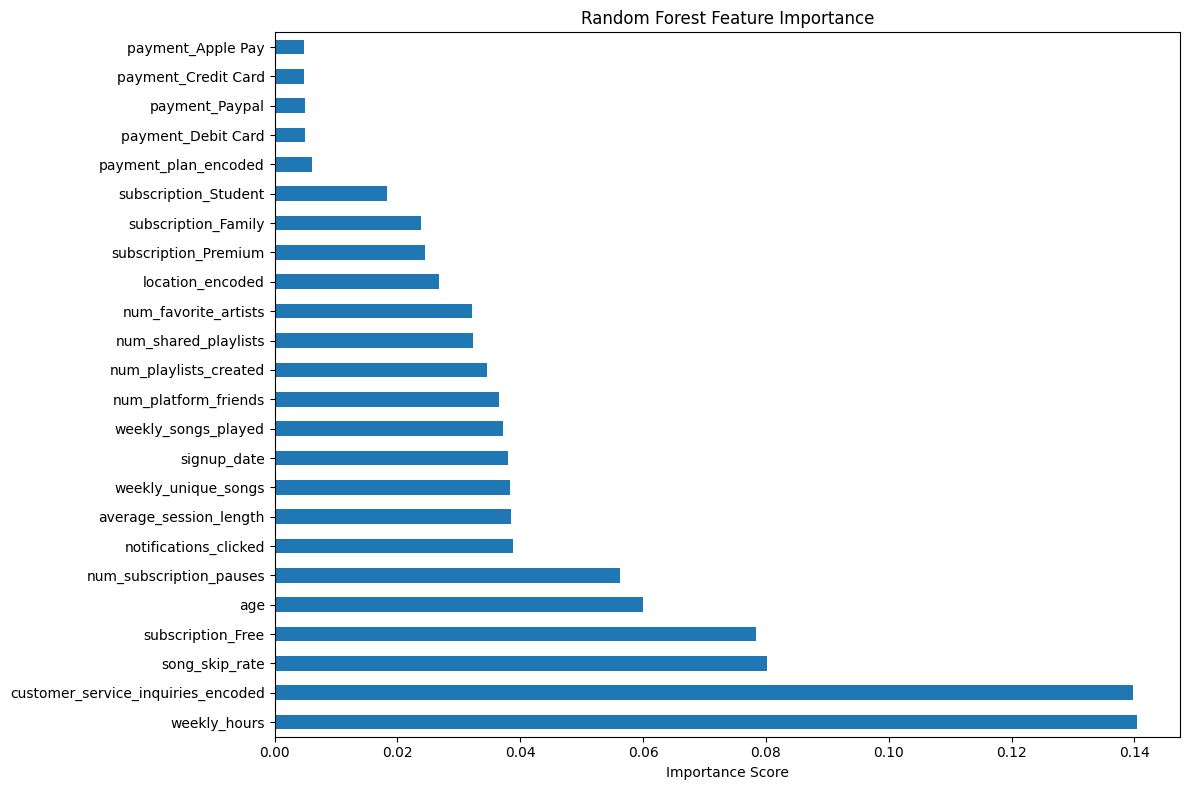

In [14]:
# Plot feature importance
plt.figure(figsize=(12, 8))
rf_importance.plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.inspection import permutation_importance

In [16]:
# Calculate permutation importance
result = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
perm_importance = pd.Series(result.importances_mean, index=X.columns)
perm_importance = perm_importance.sort_values(ascending=False)

print("Top 10 features by Permutation importance:")
print(perm_importance.head(10))

# Also show standard deviation to assess stability
perm_importance_std = pd.Series(result.importances_std, index=X.columns)
perm_importance_std = perm_importance_std.reindex(perm_importance.index)
print("\nStandard deviation of importance scores:")
print(perm_importance_std.head(10))

Top 10 features by Permutation importance:
customer_service_inquiries_encoded    0.214347
weekly_hours                          0.163681
subscription_Free                     0.115650
num_subscription_pauses               0.111526
song_skip_rate                        0.101184
age                                   0.084034
subscription_Student                  0.034375
notifications_clicked                 0.028896
subscription_Premium                  0.026357
subscription_Family                   0.019999
dtype: float64

Standard deviation of importance scores:
customer_service_inquiries_encoded    0.000833
weekly_hours                          0.000532
subscription_Free                     0.000549
num_subscription_pauses               0.000680
song_skip_rate                        0.000556
age                                   0.000559
subscription_Student                  0.000371
notifications_clicked                 0.000200
subscription_Premium                  0.000216
subscri

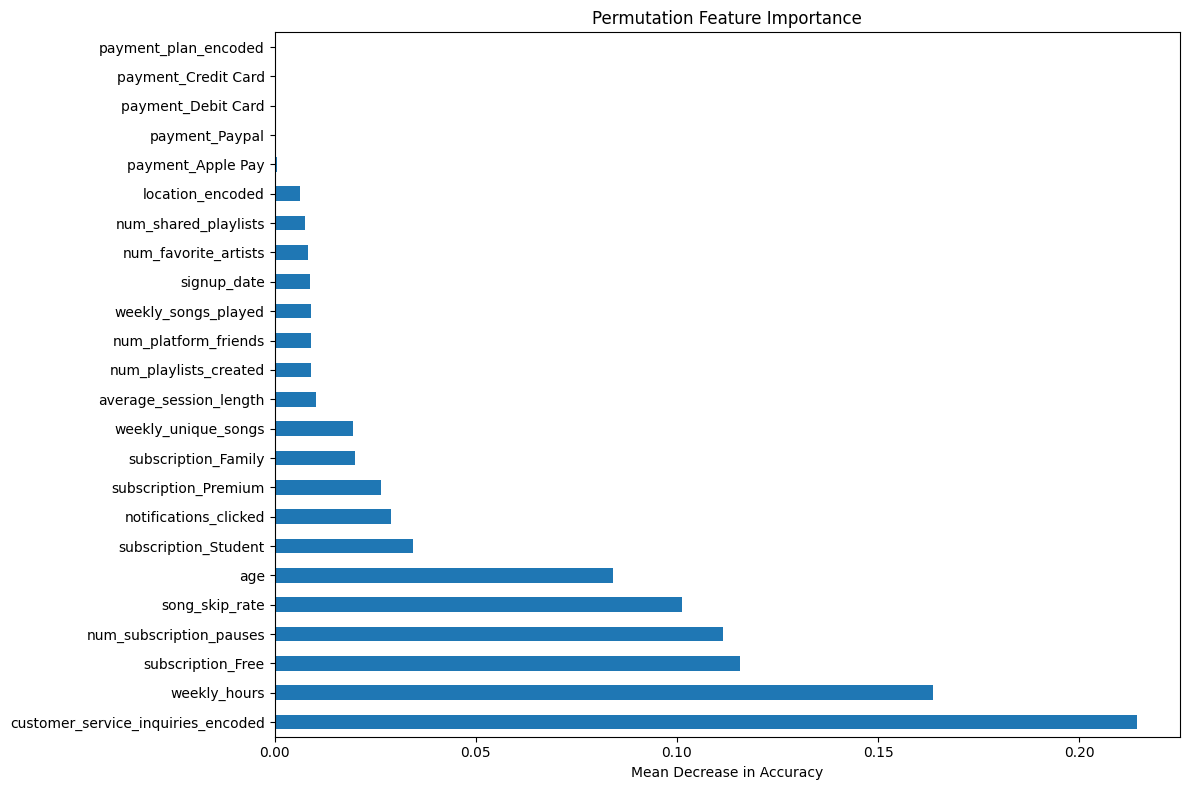

In [17]:
# Plot permutation importance
plt.figure(figsize=(12, 8))
perm_importance.plot(kind='barh')
plt.title('Permutation Feature Importance')
plt.xlabel('Mean Decrease in Accuracy')
plt.tight_layout()
plt.show()

In [18]:
df_engineered = features_df.copy()

In [19]:
df_engineered['tenure_days'] = abs(df_engineered['signup_date'])
#Normalized Signup_recency feature
df_engineered['signup_recency'] = df_engineered['tenure_days'] / df_engineered['tenure_days'].max()

In [20]:
df_engineered['engagement_score'] = df_engineered.apply(lambda row: row['weekly_songs_played'] / row['weekly_hours'] if row['weekly_hours'] > 0 else 0, axis=1)

In [21]:
df_engineered['session_frequency'] = df_engineered.apply(
        lambda row: row['weekly_hours'] / row['average_session_length'] if row['average_session_length'] > 0 else 0,
        axis=1
    )

In [22]:
df_engineered['song_diversity_ratio'] = df_engineered.apply(
        lambda row: row['weekly_unique_songs'] / row['weekly_songs_played'] if row['weekly_songs_played'] > 0 else 0,
        axis=1
    )

In [23]:
# Calculate social activity score
max_friends = df_engineered['num_platform_friends'].max() or 1
max_playlists = df_engineered['num_playlists_created'].max() or 1
max_shared = df_engineered['num_shared_playlists'].max() or 1

df_engineered['social_activity_score'] = (
    (df_engineered['num_platform_friends'] / max_friends) +
    (df_engineered['num_playlists_created'] / max_playlists) +
    (df_engineered['num_shared_playlists'] / max_shared)
) / 3

In [24]:
# Pause frequency normalized by tenure
df_engineered['pause_frequency'] = df_engineered.apply(
    lambda row: row['num_subscription_pauses'] / (row['tenure_days'] / 30) if row['tenure_days'] > 0 else 0,
    axis=1
)

In [25]:
# Notification engagement rate
max_notifications = df_engineered['notifications_clicked'].max() or 1
df_engineered['notification_engagement_rate'] = df_engineered['notifications_clicked'] / max_notifications

In [26]:
df_engineered['activity_recency_score'] = (
    (df_engineered['notification_engagement_rate'] * 0.4) +
    (df_engineered['session_frequency'] * 0.3) +
    (df_engineered['social_activity_score'] * 0.3)
)

In [27]:
df_engineered['engagement_diversity'] = df_engineered['engagement_score'] * df_engineered['song_diversity_ratio']

In [28]:
df_engineered['churn_risk_score'] = (
        df_engineered['pause_frequency'] * 0.3 +
        (1 - df_engineered['engagement_score'] / (df_engineered['engagement_score'].max() or 1)) * 0.2 +
        df_engineered['customer_service_inquiries_encoded'] * 0.2 +
        (1 - df_engineered['activity_recency_score']) * 0.3
    )

In [29]:
df_engineered.drop(columns=['signup_date'], inplace=True)

In [30]:
df_engineered.to_csv('../data/processed/Dataset_engineered.csv', index=False)